# 프로야구선수 다음해 연봉예측 (연습)

In [15]:
# 프로야구 연봉 데이터셋의 기본 정보 구하기

# -*- coding: utf-8 -*-
%matplotlib inline

import matplotlib as mpl

# Windows에서 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'MS Gothic'
mpl.rcParams['axes.unicode_minus'] = False


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

picher_file_path  = './data/picher_stats_2017.csv'
batter_file_path  = './data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)  

In [4]:
picher.columns
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [7]:
print(picher.shape)

(152, 22)


In [8]:
# 예측할 대상인 '연봉'에 대한 정보
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

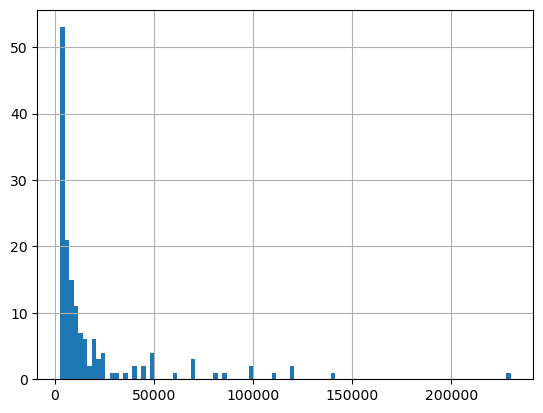

In [ ]:
# 2018년 연봉 분포 시각화
picher['연봉(2018)'].hist(bins=100)
# 단위는 만원 

<Axes: >

d:\anaconda3\envs\data_analysis_practice\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\anaconda3\envs\data_analysis_practice\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\anaconda3\envs\data_analysis_practice\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\data_analysis_practice\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


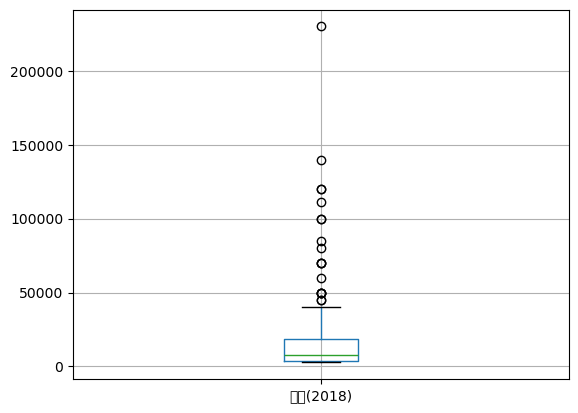

In [10]:
picher.boxplot(column=['연봉(2018)'])
# 연봉의 상자 그림을 출력

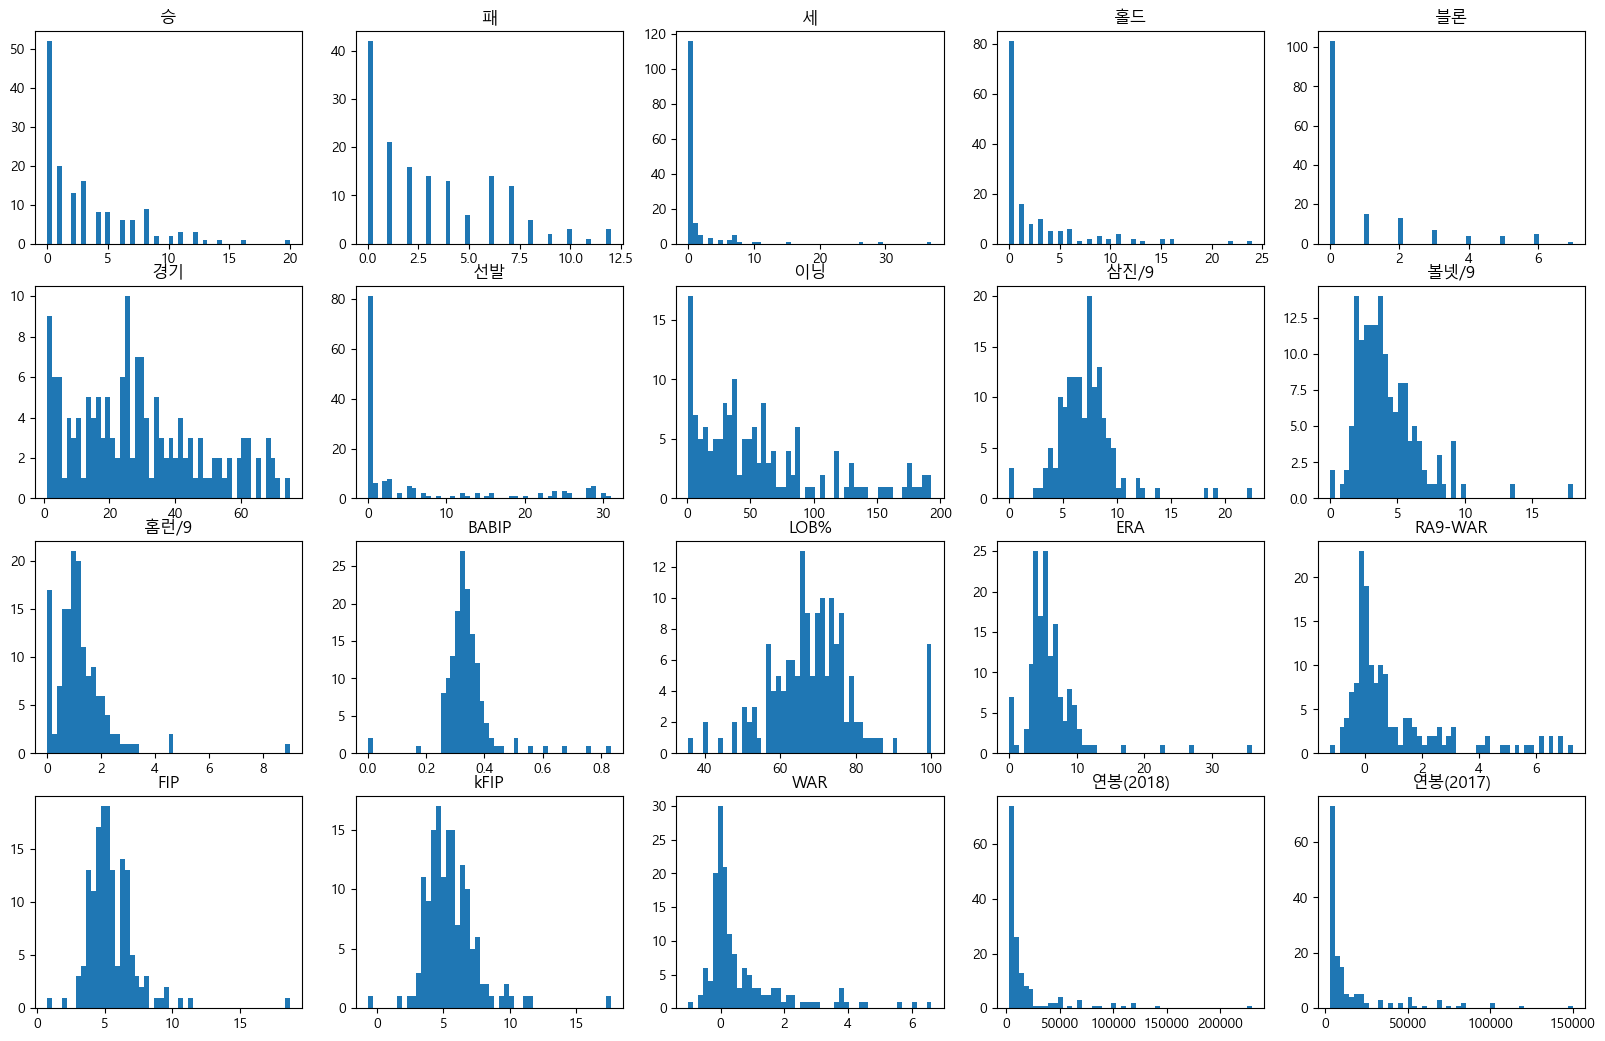

In [16]:
# 회귀 분석에 사용할 피처 살펴보기

picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP','WAR' , '연봉(2018)', '연봉(2017)']]

# 피처 각각에 대한 히스토그램을 출력

def plot_hist_each_feature(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

plot_hist_each_feature(picher_features_df)

## 예측 : 투수의 연봉 예측하기 

In [ ]:
# 피처들의 단위 맞춰주기 : 피처 스케일링 (표준화)

# 판다스 형태로 정의된 데이터 출력할 때, scientific notation(과학적 표기법) 사용하지 않도록 설정
pd.options.mode.chained_assignment = None  # default='warn'

# 피처 각각에 대한 스케일링을 수행하는 함수를 정의
def standard_scaling(df, scale_columns):
    for column in scale_columns:
        series_mean = df[column].mean()
        series_std = df[column].std()
        df[column] = df[column].apply(lambda x: (x - series_mean) / series_std)
    return df


# 피처 각각에 대한 스케일링을 수행
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR' , '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [18]:
## 피처들의 단위 맞춰주기: 원-핫 인코딩 (범주형 피처 처리)

# 팀명 피처를 원-핫 인코딩으로 변환
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
